In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

sample_sentence_1='I am happy.'
ss_1 = sid.polarity_scores(sample_sentence_1)
print('sentiment score for sentence 1',ss_1)

sample_sentence_2='I am sad.'
ss_2 = sid.polarity_scores(sample_sentence_2)
print('sentiment score for sentence 2',ss_2)

sample_sentence_3='I am going to New Delhi tommorow.'
ss_3 = sid.polarity_scores(sample_sentence_3)
print('sentiment score for sentence 3',ss_3)


sentiment score for sentence 1 {'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}
sentiment score for sentence 2 {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}
sentiment score for sentence 3 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ubuntu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<h1>1. GBDT </h1>

## 1.1 Loading Data

In [ ]:
import pandas
data = pandas.read_csv('GoogleDrive/aaic/9_Donors_choose_DT/preprocessed_data.csv')

In [ ]:
import pandas as pd
from tqdm.notebook import tqdm 

In [ ]:
neg=[]
neu=[]
pos=[]
compound=[]
for i in tqdm(data['essay']):
  a=(sid.polarity_scores(i))
  neg.append(a['neg'])
  neu.append(a['neu'])
  pos.append(a['pos'])
  compound.append(a['compound'])


  0%|          | 0/109248 [00:00<?, ?it/s]

In [ ]:
data['neg']=neg
data['pos']=pos
data['neu']=neu
data['compound']=compound

In [ ]:
data

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,neg,pos,neu,compound
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05,0.013,0.205,0.783,0.9867
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03,0.072,0.248,0.680,0.9897
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00,0.017,0.262,0.721,0.9860
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04,0.030,0.187,0.783,0.9524
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74,0.029,0.288,0.683,0.9873
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109243,hi,mrs,grades_9_12,5,1,health_sports,teamsports,our day starts 100 students athletes low incom...,143.36,0.087,0.141,0.772,0.8860
109244,nm,ms,grades_prek_2,3,1,appliedlearning,earlydevelopment other,my students range age four five years old atte...,268.57,0.051,0.227,0.722,0.9705
109245,il,mrs,grades_3_5,0,1,math_science,appliedsciences environmentalscience,we title 1 school 650 total students our eleme...,399.00,0.044,0.088,0.868,0.7960
109246,hi,mrs,grades_9_12,1,1,math_science,health_lifescience,i teach many different types students my class...,287.73,0.052,0.305,0.643,0.9866


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [ ]:
y=data['project_is_approved']
del data['project_is_approved']

In [ ]:
x=data

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,stratify=y,random_state=10)

<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
train_x

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,neg,pos,neu,compound
80193,ma,ms,grades_9_12,5,literacy_language,literacy literature_writing,my students high achieving curious ambitious u...,157.00,0.067,0.194,0.739,0.9501
49059,ok,ms,grades_prek_2,9,literacy_language,literacy,i lucky enough teach smart kind independent fi...,204.99,0.053,0.343,0.604,0.9972
60284,pa,mrs,grades_6_8,0,specialneeds,specialneeds,i 15 students life skills class grades 6 8 mod...,438.02,0.060,0.221,0.719,0.9935
34822,tx,mrs,grades_6_8,0,literacy_language,literature_writing,my students attend international leadership ch...,435.53,0.015,0.172,0.813,0.9554
9436,wi,mrs,grades_3_5,4,literacy_language specialneeds,literature_writing specialneeds,my 4th grade bilingual students come diverse b...,289.12,0.014,0.174,0.812,0.9705
...,...,...,...,...,...,...,...,...,...,...,...,...
102181,ct,mrs,grades_prek_2,22,math_science,appliedsciences,i blessed 22 curious eager hard working kinder...,374.40,0.093,0.309,0.598,0.9951
79278,pa,mrs,grades_3_5,7,literacy_language,literacy,my students come school everyday thirst knowle...,95.70,0.024,0.393,0.583,0.9950
73570,nc,mr,grades_6_8,12,history_civics literacy_language,history_geography literacy,the scholars school leaders tomorrow many work...,58.57,0.125,0.266,0.608,0.9604
58966,il,ms,grades_prek_2,1,literacy_language math_science,literacy mathematics,our community small town limited resources we ...,248.99,0.092,0.189,0.718,0.8979


In [ ]:
v=TfidfVectorizer()
train_essay=v.fit_transform(train_x['essay'])
test_essay=v.transform(test_x['essay'])

In [ ]:
train_essay

<81936x50413 sparse matrix of type '<class 'numpy.float64'>'
	with 8853171 stored elements in Compressed Sparse Row format>

In [ ]:
test_essay

<27312x50413 sparse matrix of type '<class 'numpy.float64'>'
	with 2945048 stored elements in Compressed Sparse Row format>

In [ ]:
train_sparse=train_essay
test_sparse=test_essay

In [ ]:
import scipy.sparse as sp
train_sparse=sp.coo_matrix(train_sparse)
test_sparse=sp.coo_matrix(test_sparse)

<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [ ]:
def response_codding_values(x,y,test=False,label=False): #it remembers the train responce codding values to use for the test set 
    if test==True:
      global rc_encodding
      return rc_encodding[label]
    a=x
    y_1=dict((a[y==1].value_counts())/a.value_counts())
    y_0=dict((a[y==0].value_counts())/a.value_counts())
    return y_0,y_1

In [ ]:
def response_coding(x,y,test=False,label=False): #compute resopnse codding 
  y_0,y_1=response_codding_values(x,y,test=test,label=label)
  l=[]
  a=x
  for i in a:
    try:
      l.append(y_1[i])
    except:
      l.append(0.5)
  u=[]
  for i in a:
    try:
      u.append(y_0[i])
    except:
      u.append(0.5)
  return pd.Series(u).fillna(0),pd.Series(l).fillna(0)

In [ ]:
from scipy.sparse import hstack

In [ ]:
rc_features=['school_state','teacher_prefix','project_grade_category','clean_categories','clean_subcategories']
rc_encodding=dict()
for i in rc_features:
  rc_encodding[i]=response_codding_values(train_x[i],y)
  y_0,y_1=response_coding(train_x[i],y)
  #train_sparse=hstack(train_sparse,y_0.to_list(),y_1.to_list())
  train_sparse=hstack([train_sparse,y_0.to_numpy().reshape(-1,1),y_1.to_numpy().reshape(-1,1)])

In [ ]:
rc_features=['school_state','teacher_prefix','project_grade_category','clean_categories','clean_subcategories']
for i in rc_features:
  rc_encodding[i]=response_codding_values(test_x[i],y,label=i,test=True)
  y_0,y_1=response_coding(test_x[i],y,label=i,test=True)
  #train_sparse=hstack(train_sparse,y_0.tolist(),y_1.tolist())
  test_sparse=hstack([test_sparse,y_0.to_numpy().reshape(-1,1),y_1.to_numpy().reshape(-1,1)])

In [ ]:
contineous_features=['teacher_number_of_previously_posted_projects','price','neg','pos','compound','neu']
for i in contineous_features:
  train_sparse=hstack([train_sparse,train_x[i].to_numpy().reshape(-1,1)])

In [ ]:
contineous_features=['teacher_number_of_previously_posted_projects','price','neg','pos','compound','neu']
for i in contineous_features:
  test_sparse=hstack([test_sparse,test_x[i].to_numpy().reshape(-1,1)])

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
train_sparse

<81936x50429 sparse matrix of type '<class 'numpy.float64'>'
	with 10134296 stored elements in COOrdinate format>

In [ ]:
test_sparse

<27312x50429 sparse matrix of type '<class 'numpy.float64'>'
	with 3372120 stored elements in COOrdinate format>

In [ ]:
train_y.shape

(81936,)

In [ ]:
test_y.shape

(27312,)

In [ ]:
param_grid=paras={'max_depth':[1, 3, 10, 30],'n_estimators':[100,200,300]}
grid=GridSearchCV(model,param_grid,scoring='roc_auc',cv=10,n_jobs=-1,return_train_score=True,verbose=True)
grid.fit(train_sparse,train_y)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


/home/ubuntu/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/ubuntu/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/ubuntu/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: 

[06:49:39] WARNING: /workspace/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:50:43] WARNING: /workspace/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:51:49] WARNING: /workspace/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:52:54] WARNING: /workspace/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if 

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weigh

In [ ]:
grid0=grid

In [ ]:
import seaborn as sns

In [ ]:
score_dict=dict()

In [ ]:
score_dict['param_max_depth']=grid.cv_results_['param_max_depth']

In [ ]:
score_dict['param_n_estimators']=grid.cv_results_['param_n_estimators']

In [ ]:
score_dict['mean_test_score']=grid.cv_results_['mean_test_score']

<AxesSubplot:>

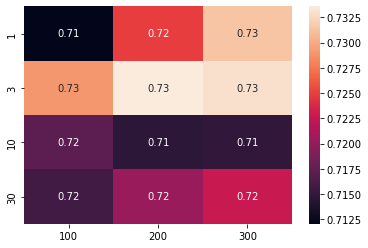

In [ ]:
sns.heatmap(pd.DataFrame(score_dict['mean_test_score'].reshape(4,3),columns=[100,200,300],index=[1,3,10,30]),annot=True)

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(max_depth=grid.best_params_['max_depth'],n_estimators=grid.best_params_['n_estimators'])

In [ ]:
model.fit(train_sparse,train_y)

[16:39:37] WARNING: /workspace/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
import matplotlib.pyplot as plt

Text(33.0, 0.5, 'actual')

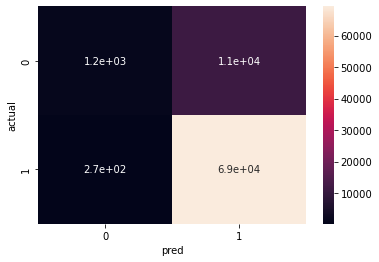

In [ ]:
sns.heatmap(confusion_matrix(train_y,model.predict(train_sparse)),annot=True)
plt.xlabel('pred')
plt.ylabel('actual')

Text(33.0, 0.5, 'actual')

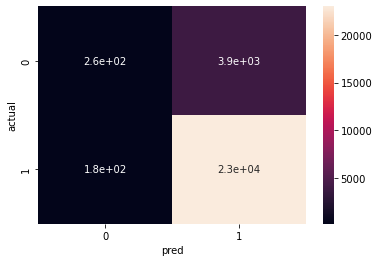

In [ ]:
sns.heatmap(confusion_matrix(test_y,model.predict(test_sparse)),annot=True)
plt.xlabel('pred')
plt.ylabel('actual')

In [ ]:
from sklearn.metrics import auc,roc_auc_score,roc_curve

In [ ]:
fpr_train,tpr_train,threshold_train=roc_curve(train_y,model.predict_proba(train_sparse).T[1])
fpr_test,tpr_test,threshold_test=roc_curve(test_y,model.predict_proba(test_sparse).T[1])

In [ ]:
print('AUC IS ',auc(fpr_test,tpr_test))

AUC IS  0.728093606329796


In [ ]:
auc0=auc(fpr_test,tpr_test)

Text(0, 0.5, 'tpr')

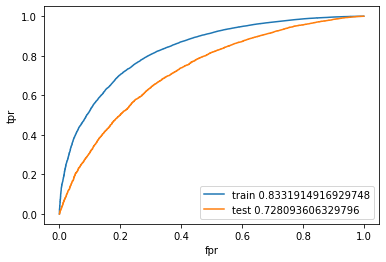

In [ ]:
plt.plot(fpr_train,tpr_train,label=f'train {auc(fpr_train,tpr_train)}')
plt.plot(fpr_test,tpr_test,label=f'test {auc(fpr_test,tpr_test)}')
plt.legend()
plt.xlabel('fpr')
plt.ylabel('tpr')

In [ ]:
import numpy as np

In [ ]:
threshold_auc=[]
th=threshold_train[np.argmax(tpr_train*(1-fpr_train))]
for i in model.predict_proba(test_sparse).T[1]:
  if i>=th:
    threshold_auc.append(1)
  else:
    threshold_auc.append(0)

In [ ]:
print('Threshold is : ',th)

Threshold is :  0.8277479


In [ ]:
threshold_auc_train=[]
th=threshold_train[np.argmax(tpr_train*(1-fpr_train))]
for i in model.predict_proba(train_sparse).T[1]:
  if i>=th:
    threshold_auc_train.append(1)
  else:
    threshold_auc_train.append(0)

Text(33.0, 0.5, 'actual')

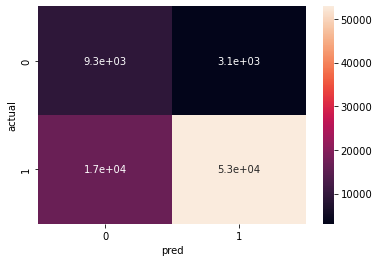

In [ ]:
sns.heatmap(confusion_matrix(train_y,threshold_auc_train),annot=True)
plt.xlabel('pred')
plt.ylabel('actual')

Text(33.0, 0.5, 'actual')

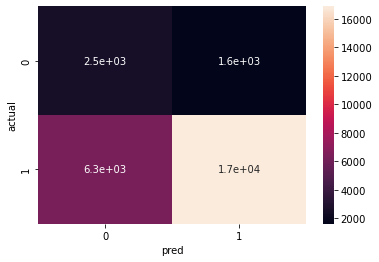

In [ ]:
sns.heatmap(confusion_matrix(test_y,threshold_auc),annot=True)
plt.xlabel('pred')
plt.ylabel('actual')

### Using TFIDF Weighted glove vectors and checking for this feature improves the performace of model

In [ ]:
#please use below code to load glove vectors 
import pickle
with open('/home/ubuntu/Downloads/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [ ]:
tfidf_model=v
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [ ]:
# average Word2Vec
# compute average word2vec for each review.
x_train=train_x
import numpy as np
x_train_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    x_train_tfidf_w2v_vectors.append(vector)

print(len(x_train_tfidf_w2v_vectors))
print(len(x_train_tfidf_w2v_vectors[0]))

  0%|          | 0/81936 [00:00<?, ?it/s]

[06:49:39] WARNING: /workspace/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:50:43] WARNING: /workspace/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:51:51] WARNING: /workspace/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:54:02] WARNING: /workspace/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if 

In [ ]:
# average Word2Vec
# compute average word2vec for each review.
x_test=test_x
x_test_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    x_test_tfidf_w2v_vectors.append(vector)

print(len(x_test_tfidf_w2v_vectors))
print(len(x_test_tfidf_w2v_vectors[0]))

  0%|          | 0/27312 [00:00<?, ?it/s]

27312
300


In [ ]:
import scipy.sparse as sp
train_sparse=sp.coo_matrix(x_train_tfidf_w2v_vectors)
test_sparse=sp.coo_matrix(x_test_tfidf_w2v_vectors)

In [ ]:
def response_codding_values(x,y,test=False,label=False):
    if test==True:
      global rc_encodding
      return rc_encodding[label]
    a=x
    y_1=dict((a[y==1].value_counts())/a.value_counts())
    y_0=dict((a[y==0].value_counts())/a.value_counts())
    return y_0,y_1

In [ ]:
def response_coding(x,y,test=False,label=False):
  y_0,y_1=response_codding_values(x,y,test=test,label=label)
  l=[]
  a=x
  for i in a:
    try:
      l.append(y_1[i])
    except:
      l.append(0.5)
  u=[]
  for i in a:
    try:
      u.append(y_0[i])
    except:
      u.append(0.5)
  return pd.Series(u).fillna(0),pd.Series(l).fillna(0)

In [ ]:
from scipy.sparse import hstack

In [ ]:
rc_features=['school_state','teacher_prefix','project_grade_category','clean_categories','clean_subcategories']
rc_encodding=dict()
for i in rc_features:
  rc_encodding[i]=response_codding_values(train_x[i],y)
  y_0,y_1=response_coding(train_x[i],y)
  train_sparse=hstack([train_sparse,y_0.to_numpy().reshape(-1,1),y_1.to_numpy().reshape(-1,1)])

In [ ]:
rc_features=['school_state','teacher_prefix','project_grade_category','clean_categories','clean_subcategories']
for i in rc_features:
  rc_encodding[i]=response_codding_values(test_x[i],y,label=i,test=True)
  y_0,y_1=response_coding(test_x[i],y,label=i,test=True)
  test_sparse=hstack([test_sparse,y_0.to_numpy().reshape(-1,1),y_1.to_numpy().reshape(-1,1)])

In [ ]:
contineous_features=['teacher_number_of_previously_posted_projects','price']
for i in contineous_features:
  train_sparse=hstack([train_sparse,train_x[i].to_numpy().reshape(-1,1)])

In [ ]:
contineous_features=['teacher_number_of_previously_posted_projects','price']
for i in contineous_features:
  test_sparse=hstack([test_sparse,test_x[i].to_numpy().reshape(-1,1)])

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid=paras={'max_depth':[1, 3, 10, 30],'n_estimators':[100,200,300]}
grid=GridSearchCV(model,param_grid,scoring='roc_auc',cv=10,n_jobs=-1,return_train_score=True,verbose=True)
grid.fit(train_sparse,train_y)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


/home/ubuntu/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/ubuntu/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/ubuntu/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: 

[16:45:07] WARNING: /workspace/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:46:35] WARNING: /workspace/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:47:55] WARNING: /workspace/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:49:20] WARNING: /workspace/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if 

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weigh

In [ ]:
import seaborn as sns

In [ ]:
score_dict=dict()

In [ ]:
score_dict['param_max_depth']=grid.cv_results_['param_max_depth']

In [ ]:
score_dict['param_n_estimators']=grid.cv_results_['param_n_estimators']

In [ ]:
score_dict['mean_test_score']=grid.cv_results_['mean_test_score']

<AxesSubplot:>

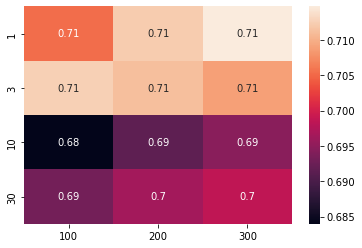

In [ ]:
sns.heatmap(pd.DataFrame(score_dict['mean_test_score'].reshape(4,3),columns=[100,200,300],index=[1,3,10,30]),annot=True)

In [ ]:
model = XGBClassifier(max_depth=grid.best_params_['max_depth'],n_estimators=grid.best_params_['n_estimators'])

In [ ]:
model.fit(train_sparse,train_y)

[03:01:41] WARNING: /workspace/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=1, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
from sklearn.metrics import confusion_matrix

Text(33.0, 0.5, 'actual')

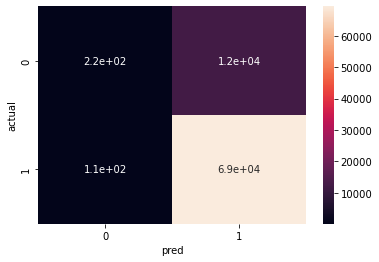

In [ ]:
sns.heatmap(confusion_matrix(train_y,model.predict(train_sparse)),annot=True)
plt.xlabel('pred')
plt.ylabel('actual')

Text(33.0, 0.5, 'actual')

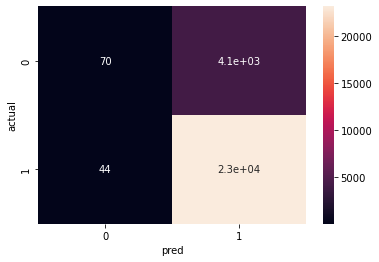

In [ ]:
sns.heatmap(confusion_matrix(test_y,model.predict(test_sparse)),annot=True)
plt.xlabel('pred')
plt.ylabel('actual')

In [ ]:
from sklearn.metrics import auc,roc_auc_score,roc_curve

In [ ]:
fpr_train,tpr_train,threshold_train=roc_curve(train_y,model.predict_proba(train_sparse).T[1])
fpr_test,tpr_test,threshold_test=roc_curve(test_y,model.predict_proba(test_sparse).T[1])

In [ ]:
print('AUC IS ',auc(fpr_test,tpr_test))

AUC IS  0.7069158855783046


In [ ]:
auc1=auc(fpr_test,tpr_test)

Text(0, 0.5, 'tpr')

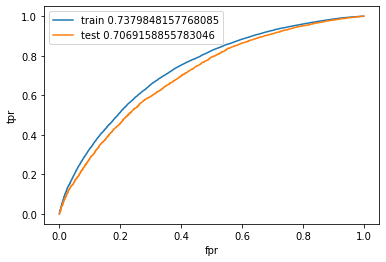

In [ ]:
plt.plot(fpr_train,tpr_train,label=f'train {auc(fpr_train,tpr_train)}')
plt.plot(fpr_test,tpr_test,label=f'test {auc(fpr_test,tpr_test)}')
plt.legend()
plt.xlabel('fpr')
plt.ylabel('tpr')

In [ ]:
threshold_auc=[]
th=threshold_train[np.argmax(tpr_train*(1-fpr_train))]
for i in model.predict_proba(test_sparse).T[1]:
  if i>=th:
    threshold_auc.append(1)
  else:
    threshold_auc.append(0)

In [ ]:
print('Threshold is : ',th)

Threshold is :  0.83837825


In [ ]:
threshold_auc_train=[]
th=threshold_train[np.argmax(tpr_train*(1-fpr_train))]
for i in model.predict_proba(train_sparse).T[1]:
  if i>=th:
    threshold_auc_train.append(1)
  else:
    threshold_auc_train.append(0)

Text(33.0, 0.5, 'actual')

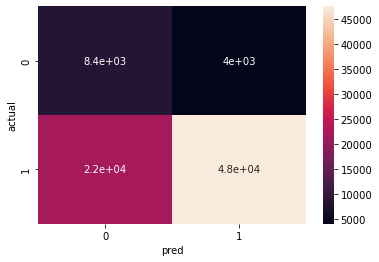

In [ ]:
sns.heatmap(confusion_matrix(train_y,threshold_auc_train),annot=True)
plt.xlabel('pred')
plt.ylabel('actual')

Text(33.0, 0.5, 'actual')

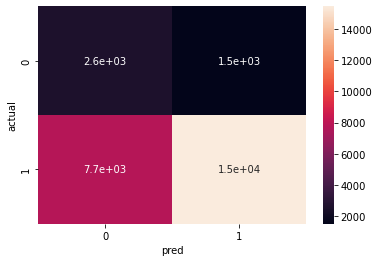

In [ ]:
sns.heatmap(confusion_matrix(test_y,threshold_auc),annot=True)
plt.xlabel('pred')
plt.ylabel('actual')

In [ ]:
conclusion=dict()
conclusion['tfidf']=grid0.best_params_
conclusion['tfidf_w2v']=grid.best_params_
conclusion['tfidf']['auc']=auc0
conclusion['tfidf_w2v']['auc']=auc1
conclusion=pd.DataFrame(conclusion)

In [ ]:
from tabulate import tabulate

In [ ]:
print('SUMMARY'.center(40))
print(tabulate(conclusion, headers='keys', tablefmt='psql'))

                SUMMARY                 
+--------------+------------+-------------+
|              |      tfidf |   tfidf_w2v |
|--------------+------------+-------------|
| max_depth    |   3        |    1        |
| n_estimators | 200        |  300        |
| auc          |   0.728094 |    0.706916 |
+--------------+------------+-------------+
